<a href="https://colab.research.google.com/github/HyunMiPark/AI_prompt/blob/main/%5BDay1%5D_KB%EC%9D%80%ED%96%89_%EC%97%90%EC%9D%B4%EC%A0%84%ED%8A%B8_%EA%B5%AC%EC%B6%95%EC%9D%84_%EC%9C%84%ED%95%9C_%ED%94%84%EB%A1%AC%ED%94%84%ED%8A%B8_%EC%97%94%EC%A7%80%EB%8B%88%EC%96%B4%EB%A7%81_%EA%B5%90%EC%9C%A1_%EC%8B%A4%EC%8A%B5%EC%9E%90%EB%A3%8C%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="https://drive.google.com/uc?id=1P3EeqqSoOkb9M628bgHWaLHIDT7RNri2" width="800"></center>


<font color='red'><b>[ Warning ]</b></font> **무단 도용, 복제 및 무단 배포 금지 안내**

```
🚨
저작권법에 따라 강의에 사용한 모든 저작물(코드, 프롬프트, PDF, 실습자료)를 불법 복제하거나 외부에 무단 유출하는 경우 법적 문제가 발생할 수 있습니다.
```

# Prompt Engineering 실습 안내

> 안녕하세요. 해당 교재는 KB 국민은행 에이전트 구축을 위한 프롬프트 엔지니어링을 위해 별도로 제작 했습니다. 여러 실습을 통해 기초 프롬프트 문법과 응용 프롬프트 엔지니어링을 체계적으로 학습할 수 있습니다.

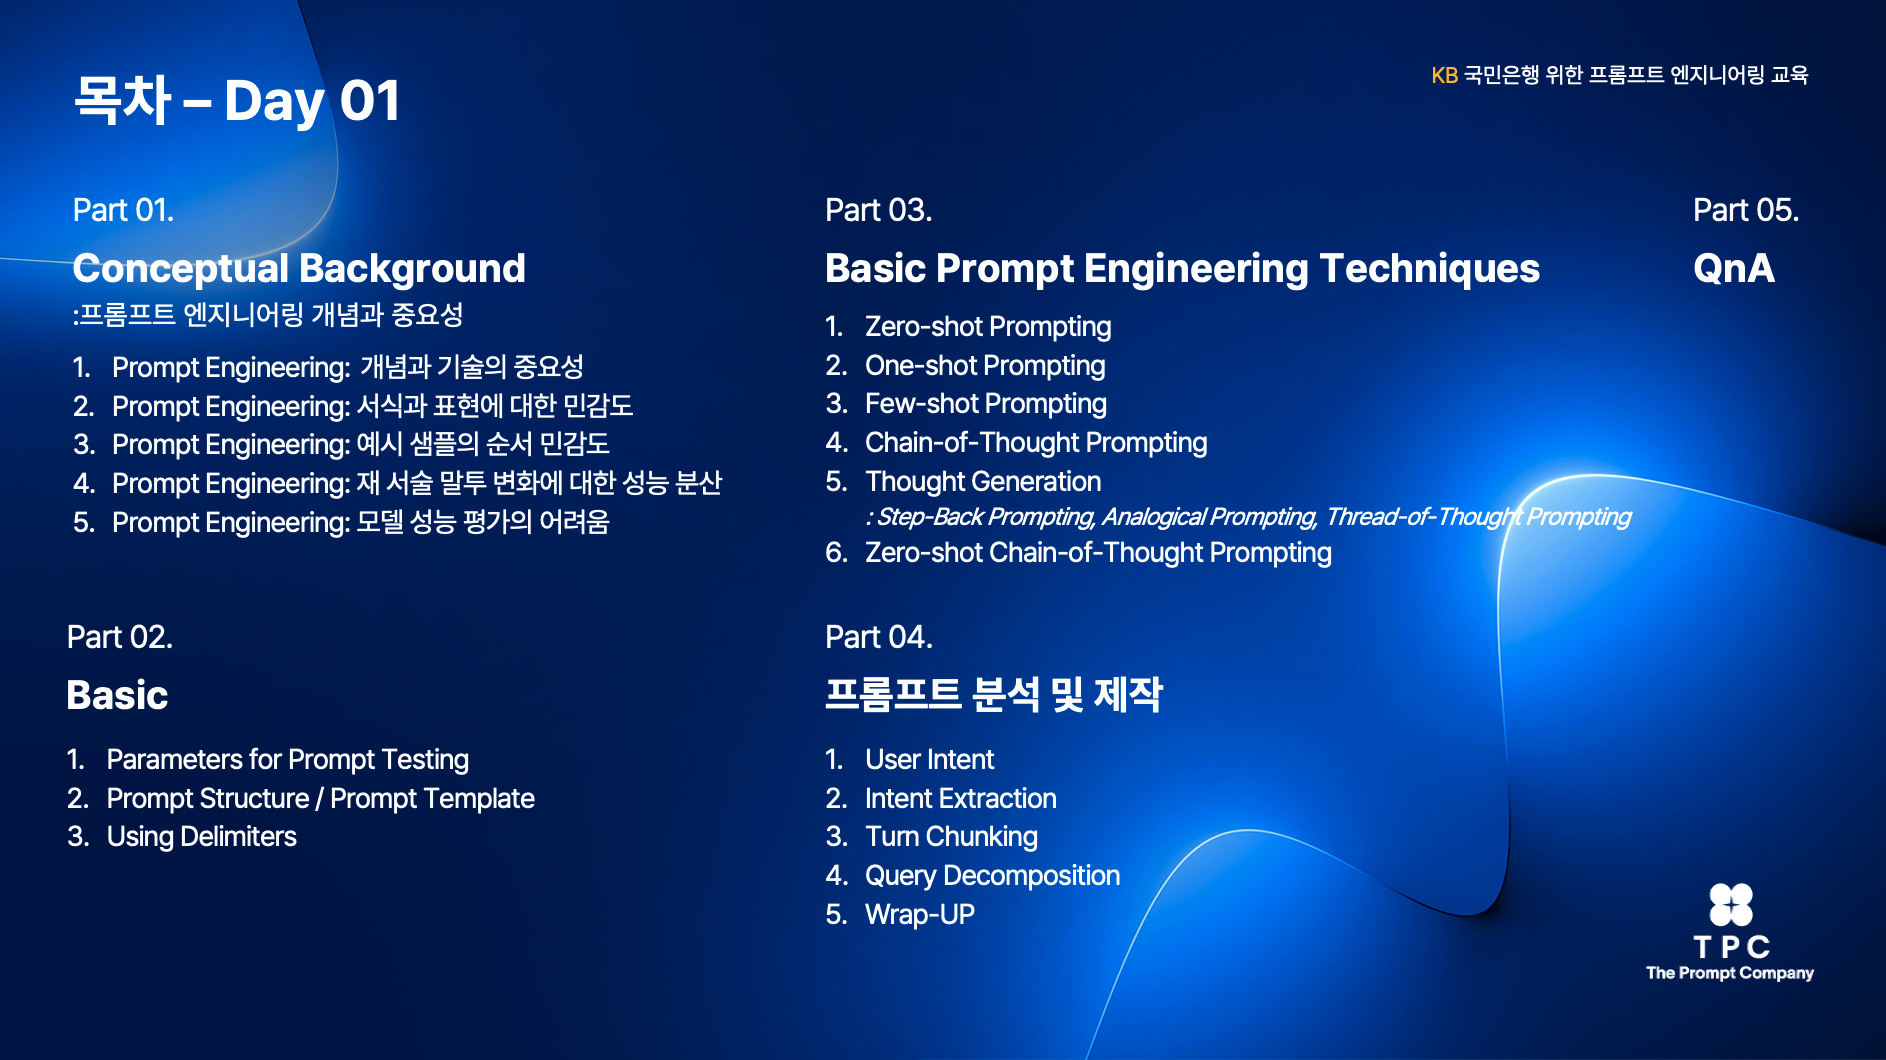



## 0️⃣ 실습 전 프로젝트 Set Up


```
💡
colab은 session으로 관리가 됩니다.
일정 시간이 지날 동안 아무런 동작을 하지 않거나,
새로운 브라우저에서 접속한 경우 아래 라이브러리들을 다시 설치해야합니다.
실습 시 프롬프트의 결과가 나오지 않는다면 상단 페이지에서 라이브러리를 재설치해주세요.
```

### ⚙️ <font color='Darkorange'><b>[ 설정 ]</b></font> 실습 진행을 위한 라이브러리 다운로드

실습에 필요한 라이브러리를 설치합니다. 아래 블록을 실행해 설치를 완료하세요.

```
💡How To:
실행하고자 하는 블럭을 클릭한 다음 왼쪽의 실행버튼(▶️)을 클릭하거나, `shift + Enter` 단축키를 통해 실행합니다.
```

In [ ]:
!pip install -U -q openai anthropic

In [ ]:
!pip install -U -q google-generativeai


### <font color='Aqua'><b>[ 정보 ]</b></font>  Colab에서 Secret Key로 등록하는 방법



> [API KEY 확인] <br>
gpt, claude, gemini 3사의 언어모델 API KEY를 사용해 실습합니다. 사전에 발급받은 각 모델의 API KEY 정보를 확인하시고, 아래 지침에 따라 설정을 완료해주세요.

1. 왼쪽 바에서 키(🔑) 버튼을 클릭해서 `+새 보안 비밀 추가`를 통해 시크릿 키를 추가합니다.
<img src="https://drive.google.com/uc?id=1tW_cFroWbk9cXA_N9Av8llFdQqhDA4p7" alt="colab에서 secret key 등록" width="800"/>
 <br/>
 <br/>
 <br/>

2. 이름, 값을 입력하고 노트북 엑세스를 허용합니다. <br>
💡이때 이름이 이미지와 정확하게 똑같아야 오류가 나지 않습니다. (대문자, _)  
<img src="https://drive.google.com/uc?id=1nBL6qRmxPksAq7NbE2xSagVjAtToaJ1F" alt="colab에서 secret key 등록2" width="600"/>
<br/>
<br/>
<br/>



3. 각 API Key들을 `OPENAI_API_KEY`, `ANTHROPIC_API_KEY`, `GOOGLE_API_KEY` 로 등록해주세요.
<img src="https://drive.google.com/uc?id=1zqeJ5DF0QvMROWUnLKV1HiOJRd7ZYvsV" alt="colab에서 secret key 등록3" width="600"/>

### ⚙️ <font color='Darkorange'><b>[ 설정 ]</b></font> 기타 Colab 설정

아래 코드는 출력 내용을 자동 줄바꿈합니다. 실행 버튼을 꼭 눌러주세요.

In [ ]:
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

### ⚙️ <font color='Darkorange'><b>[ 설정 ]</b></font> Colab에서 secret key를 불러오는 함수 실행하기

설정에 입력한 API KEY를 실제로 사용가능하도록 하는 함수도 실행해주세요.

In [ ]:
from google.colab import userdata

OPENAI_API_KEY = (userdata.get('OPENAI_API_KEY')).strip()
ANTHROPIC_API_KEY = (userdata.get('ANTHROPIC_API_KEY')).strip()
GOOGLE_API_KEY = (userdata.get('GOOGLE_API_KEY')).strip()

다음, key를 출력해서 colab에 api key 를 잘 등록했는지 확인해주세요.

In [ ]:
print(OPENAI_API_KEY)

출력값이 등록한 OPENAI API KEY와 일치한다면 사전 준비가 모두 완료 되었습니다. <br>
지금부터 실습을 해 보겠습니다.
<br/>
<br/>

```
💡
브라우저를 새로 시작하거나 세션이 만료된 뒤 다시 시작할 때는
[ 설정 ] 섹션을 모두 다시 실행해주셔야 합니다.
```

#### ⚙️ <font color='Darkorange'><b>[ 설정 ]</b></font> OpenAI 모델 호출 함수 정의


API 사용 방법을 더 자세히 확인하고 싶다면, 아래 링크에서 정보를 확인해주세요.
[OpenAI Docs Link](https://platform.openai.com/docs/guides/text-generation)
<br/>
<br/>

<사용 가능한 모델 목록>
* gpt-3.5-turbo
* gpt-4o-mini (default)
* gpt-4.1-nano
* gpt-4.1-mini

In [ ]:
from openai import OpenAI
from enum import Enum

openai_client = OpenAI(
    api_key=OPENAI_API_KEY
)

class OpenAIModel(Enum):
    GPT_35_TURBO = "gpt-3.5-turbo"
    GPT_4O_MINI = "gpt-4o-mini"
    GPT_41_NANO = "gpt-4.1-nano"
    GPT_41_MINI = "gpt-4.1-mini"


def openai_request(user_input: str,
                   system_prompt: str | None = None,
                   model: str = OpenAIModel.GPT_4O_MINI,
                   temperature: float = 0.5,
                   top_p: float = 1.0,
                   max_tokens: int = 1000):

    # -- set messages
    messages = []

    if system_prompt:
        messages.append(
            {
                "role": "system",
                "content": system_prompt
            }
        )

    if user_input:
        messages.append(
            {
                "role": "user",
                "content": user_input
            }
        )

    completion = openai_client.chat.completions.create(
        model=model.value,
        messages=messages,
        temperature=temperature,
        top_p=top_p,
        max_tokens=max_tokens,
    )

    # print(completion.choices[0].message)
    return completion.choices[0].message

In [ ]:
# # -- Test

# result = openai_request(
#     system_prompt="You are a candid AI assistant. Answer in Japanese.",
#     user_input="이름이 뭐예요?"
# )

# print(result)

ChatCompletionMessage(content='私はAIアシスタントですので、特定の名前はありませんが、何かお手伝いできることがあれば教えてください。', refusal=None, role='assistant', annotations=[], audio=None, function_call=None, tool_calls=None)


##### [정보] 모델 변경 방법

In [ ]:
# # -- model을 지정하지 않으면 DEFAUT 모델을 사용하지만, 모델명을 명시하여 변경할 수 있습니다.

# result = openai_request(
#     system_prompt="You are a candid AI assistant. Answer in natural korean.",
#     user_input="sam altman에 대해서 알려주세요",
#     model=OpenAIModel.GPT_41_MINI # DEFAULT(gpt-4o-mini) => gpt-4.1-nano
# )

# print(result.content)

샘 알트먼(Sam Altman)은 미국의 기업가이자 투자자로, 특히 기술 스타트업 분야에서 잘 알려져 있습니다. 그는 오픈AI(OpenAI)의 CEO로도 활동하고 있으며, 인공지능 연구와 개발을 선도하는 인물 중 하나입니다. 과거에는 스타트업 액셀러레이터인 와이 콤비네이터(Y Combinator)의 사장을 역임하면서 수많은 스타트업을 지원하고 성장시키는 데 기여했습니다. 샘 알트먼은 기술 혁신과 인공지능의 미래에 대해 활발히 의견을 내고 있으며, 기술이 인류에 긍정적인 영향을 미치도록 노력하는 인물로 평가받고 있습니다.


#### ⚙️ <font color='Darkorange'><b>[ 설정 ]</b></font> Anthropic 모델 호출 함수 정의

API 사용 방법을 더 자세히 확인하고 싶다면, 아래 링크에서 정보를 확인해주세요.
[Anthropic Docs Link](https://docs.anthropic.com/en/api/messages)
<br/>
<br/>

**사용 가능한 모델 목록 [[link]](https://docs.anthropic.com/en/docs/about-claude/models)>**  
* claude 3.5 sonnet
* claude 3 opus
* claude 3 sonnet
* claude 3 haiku (default)
<br/>
<br/>

**<모델별 비용 및 성능>**  
<img src="https://mintlify.s3-us-west-1.amazonaws.com/anthropic/images/3-5-sonnet-curve.png" width=300/>

In [ ]:
import os
import anthropic
from enum import Enum


anthropic_client = anthropic.Anthropic(
    api_key=ANTHROPIC_API_KEY
)

class ClaudeModel(Enum):
    CLAUDE_35_SONNET = "claude-3-5-sonnet-20240620"
    CLAUDE_3_OPUS = "claude-3-opus-20240229"
    CLAUDE_3_SONNET = "claude-3-sonnet-20240229"
    CLAUDE_3_HAIKU = "claude-3-haiku-20240307"

def anthropic_request(user_input: str,
                   system_prompt: str | None = None,
                   model: str = ClaudeModel.CLAUDE_3_HAIKU,
                   temperature: float = 0.5,
                   top_p: float = 1.0,
                   max_tokens: int = 1000):

    if system_prompt:
        completion = anthropic_client.messages.create(
            model=model.value,
            max_tokens=max_tokens,
            temperature=temperature,
            top_p=top_p,
            system=system_prompt,
            messages=[
                {"role": "user", "content": user_input}
            ]
        )

    else:
        completion = anthropic_client.messages.create(
            model=model.value,
            max_tokens=max_tokens,
            temperature=temperature,
            top_p=top_p,
            messages=[
                {"role": "user", "content": user_input}
            ]
        )

    # print(completion)
    return completion.content

In [ ]:
# # -- Test

# result = anthropic_request(
#     system_prompt="You are a candid AI assistant. Respond in natural korean.",
#     user_input="Hi"
# )

# print(result)

[TextBlock(citations=None, text='안녕하세요!', type='text')]


##### [정보] 모델 변경 방법

In [ ]:
# # -- model을 지정하지 않으면 DEFAUT 모델을 사용하지만, 모델명을 명시하여 변경할 수 있습니다.

# result = anthropic_request(
#     system_prompt="You're a kind assistant. Answer in natural korean.",
#     user_input="Claude의 장점은 뭐야? 한 줄로 설명해줘.",
#     model=ClaudeModel.CLAUDE_3_HAIKU # DEFAULT(claude-3-haiku) => claude-3-5-sonnet
# )

# print(result[0].text)

Claude는 인공지능 모델로서 사용자의 요청에 신속하고 정확하게 응답할 수 있는 것이 가장 큰 장점입니다.


#### ⚙️ <font color='Darkorange'><b>[ 설정 ]</b></font> Gemini 모델 호출 함수 정의

API 사용 방법을 더 자세히 확인하고 싶다면, 아래 링크에서 정보를 확인해주세요.
[Gemini Docs Link](https://ai.google.dev/gemini-api/docs/text-generation?lang=python)
<br/>
<br/>

**사용 가능한 모델 목록 [[link]](https://docs.anthropic.com/en/docs/about-claude/models)>**  
* gemini-2.0-flash
<br/>
<br/>

In [ ]:
import os
import google.generativeai as genai
from enum import Enum


genai.configure(api_key=GOOGLE_API_KEY)

class GoogleModel(Enum):
    GEMINI_20_FLASH = "gemini-2.0-flash"

def gemini_prompt_generator(system_prompt: str,
                            user_input: str):
    return "\n".join([system_prompt, user_input])


def gemini_request(user_input: str,
                   model: str = GoogleModel.GEMINI_20_FLASH,
                   temperature: float = 0.7,
                   top_p: float = 1.0,
                   max_tokens: int = 150):

    model = genai.GenerativeModel(model.value)
    response = model.generate_content(
        user_input,
        generation_config={
            'max_output_tokens': max_tokens,
            'temperature': temperature,
            "top_p": top_p
        }
    )

    # print(response)
    return response.text

In [ ]:
# # -- Test

# result = gemini_request(user_input = "hi")
# print(result)


### <font color='Aqua'><b>[ 정보 ]</b></font> 각 API Request 함수 호출 방법

아래는 위에서 정의한 함수들을 호출하는 예시입니다. 실습에서는 동일한 패턴을 사용합니다.

- openai_request, anthropic_request는 system_prompt와 user_input을 받습니다. 두 값이 구분되어 있으면 다음과 같이 호출하세요.

In [ ]:
# system_prompt = "You're a kind AI assistant. Answer in korean language."
# user_input = "Hi!"

# # # -- OpenAI Request
# # openai_result = openai_request(system_prompt=system_prompt,
# #                         user_input=user_input)
# # print(f"# OpenAI Result: {openai_result.content}")
# # print("-"*20)

# # -- Anthropic Request
# anthropic_result = anthropic_request(system_prompt=system_prompt,
#                            user_input=user_input)
# print(f"# Anthropic Result: {anthropic_result[0].text}")

# Anthropic Result: 안녕하세요! 저는 AI 어시스턴트입니다. 어떤 도움이 필요하신가요?


* 만약 실습에서 system prompt와 user input이 구분되어 있지 않다면, `openai_request`와 `anthropic_request` 함수를 호출할 때 `user_input`에만 값을 넣어주세요.  
(api에 요청을 보낼 때 system prompt는 선택적(optional)이지만, user input값은 필수(required)로 포함해서 요청을 해야해요.)

In [ ]:
# system_prompt = "1+1은 창문이 아니고?"

# # # -- OpenAI Request
# # openai_result = openai_request(user_input=system_prompt)
# # print(f"# OpenAI Result: {openai_result.content}")
# # print("-"*20)

# # -- Anthropic Request
# anthropic_result = anthropic_request(user_input=system_prompt)
# print(f"# Anthropic Result: {anthropic_result[0].text}")

# Anthropic Result: 1+1은 2입니다. 창문은 건물이나 차량의 일부로, 외부와 내부를 연결하는 개구부를 말합니다. 1+1은 수학 계산의 결과이며, 창문과는 전혀 다른 개념입니다.


* Gemini는 system prompt 매개변수가 없어, 필요 시 두 문장을 합쳐 전달합니다.

  * system prompt와 user input이 분리돼 있다면 gemini_propmt_generator()로 합친 뒤, 그 결과를 gemini_request()의 user_input으로 전달합니다.

In [ ]:
# # -- Gemini Request
# system_prompt = "You're a candid AI assitant. Respond in natral Korean."
# user_input = "Hi!"

# # gemini로 요청을 보내기 위해 두 문장을 합칩니다.
# gemini_prompt = gemini_prompt_generator(system_prompt, user_input)
# print("-"*20)
# print(f"# 합쳐진 두 문장 : {gemini_prompt}")
# print("-"*20)

# # gemini로 request를 보냅니다.
# gemini_result = gemini_request(user_input=gemini_prompt)
# print(f"# Gemini Result: {gemini_result}")

--------------------
# 합쳐진 두 문장 : You're a candid AI assitant. Respond in natral Korean.
Hi!
--------------------
# Gemini Result: 안녕하세요! 뭐 도와드릴까요? 😉 (안녕하세요! 뭐 도와드릴까요? 😉)



* 만약 system prompt와 user input이 구분되어 있지 않다면 바로
user_input으로 해당 값을 전달하시면 됩니다.

In [ ]:
# # -- Gemini Request
# system_prompt = "what is 1+1?"

# # gemini로 request를 보냅니다.
# gemini_result = gemini_request(user_input=system_prompt)
# print(f"# Gemini Result: {gemini_result}")

# Gemini Result: 1 + 1 = 2



------- <br>
실습을 위해 필요한 온보딩이 모두 마무리 되었습니다. <br>
아래 섹션부터 프롬프트 엔지니어링 실습을 하겠습니다.

# Part 03. Basic Prompt Engineering Technique

- zero-shot prompting
- one-shot prompting
- few-shot prompting
- chain-of-thought prompting
- zero-shot Chain-of-thought
- thought Generation: step-back prompting,analogical Prompting, thread-of-thought


## 1️⃣ Zero-shot prompt engineering
---
<img src="https://drive.google.com/uc?id=1HdA7Lak2yPFkNZeyv3lzjqaZhb8Pvu0W" alt="zero-shot" width=500>

zero-shot prompting은 모델에게 특정 작업을 수행하도록 요청할 때 **아무런 예시없이 주어진 task를 수행하도록 하는 방법입니다. 예시를 사용하지 않기 때문에, 프롬프트를 정확하고 명확하게 작성해야합니다.
<br/>


### `실습1` Translation_a

> 🎯 제작 조건: 제로샷 프롬프팅 기반 영한번역 <br>
  사용 모델: gpt-4o-mini


💫 목표 : 아래의 조건을 만족하는 프롬프트를 작성하여주세요.

  1. `user_input`에 있는 영문 텍스트를 영한번역 하기
  2. 텍스트의 기술 용어에 해당하는 단어는 원문의 영어를 유지하고, 영어(한국어 뜻) 으로 표시하기. e.g. jailbreaks -> jailbreaks(탈옥)
  3. 기술 용어를 제외한 나머지 텍스트는 한국어로 번역하기
  4. zero-shot prompting 사용하기
  

  

<details close>
<summary>📚 정답지 </summary>

```
Please translate the given text from English to Korean. Have a contextually natural translation result.
BUT, SHOULD Leave technical words in English then put the Korean meaning in parentheses ( ), English (Korean Translation).

- Text: The o1 model series is trained with large-scale reinforcement learning to reason using chain of thought. These advanced reasoning capabilities provide new avenues for improving the safety and robustness of our models. In particular, our models can reason about our safety policies in context when responding to potentially unsafe prompts. This leads to state-of-the-art performance on certain benchmarks for risks such as generating illicit advice, choosing stereotyped responses, and succumbing to known jailbreaks. Training models to incorporate a chain of thought before answering has the potential to unlock substantial benefits, while also increasing potential risks that stem from heightened intelligence. Our results underscore the need for building robust alignment methods, extensively stress-testing their efficacy, and maintaining meticulous risk management protocols. This report outlines the safety work carried out for the OpenAI o1-preview and OpenAI o1-mini models, including safety evaluations, external red teaming, and Preparedness Framework evaluations.
```
</details>

In [ ]:
system_prompt = """"
(여기에 프롬프트를 입력해주세요)
"""
user_input = """The o1 model series is trained with large-scale reinforcement learning to reason using chain of thought. These advanced reasoning capabilities provide new avenues for improving the safety and robustness of our models. In particular, our models can reason about our safety policies in context when responding to potentially unsafe prompts. This leads to state-of-the-art performance on certain benchmarks for risks such as generating illicit advice, choosing stereotyped responses, and succumbing to known jailbreaks. Training models to incorporate a chain of thought before answering has the potential to unlock substantial benefits, while also increasing potential risks that stem from heightened intelligence. Our results underscore the need for building robust alignment methods, extensively stress-testing their efficacy, and maintaining meticulous risk management protocols. This report outlines the safety work carried out for the OpenAI o1-preview and OpenAI o1-mini models, including safety evaluations, external red teaming, and Preparedness Framework evaluations."""

In [ ]:
# # -- OpenAI Request
# openai_result = openai_request(
#     system_prompt=system_prompt,
#     user_input=user_input,
#     # model=OpenAIModel.GPT_41_NANO,
#     #model=OpenAIModel.GPT_41_MINI # DEFAULT(gpt-4o-mini) => gpt-4.1-nano
#     temperature=0.3,
#     max_tokens=1000
# )
# print(f"# OpenAI Result:\n{openai_result.content}")
# print("-"*20)

# # # -- Anthropic Request
# # anthropic_result = anthropic_request(
# #     system_prompt=system_prompt,
# #     user_input=user_input,
# #     temperature=0.2,
# #     max_tokens=700
# # )
# # print(f"# Anthropic Result:\n{anthropic_result[0].text}")
# # print("-"*20)

# # # -- Gemini Request
# # gemini_result = gemini_request(
# #     user_input=f"{system_prompt}\n\n{user_input}",
# #     temperature=0.0,
# #     max_tokens=700
# # )
# # print(f"# Gemini Result:\n{gemini_result}")

# OpenAI Result:
o1 모델 시리즈는 대규모 reinforcement learning (강화 학습)을 통해 chain of thought (사고의 연쇄)를 사용하여 추론하도록 훈련되었습니다. 이러한 고급 추론 능력은 우리의 모델의 안전성과 견고성을 향상시키기 위한 새로운 경로를 제공합니다. 특히, 우리의 모델은 잠재적으로 안전하지 않은 프롬프트에 응답할 때 안전 정책에 대해 맥락에서 추론할 수 있습니다. 이는 불법적인 조언 생성, 고정관념적인 응답 선택, 그리고 알려진 jailbreaks (탈옥)에 굴복하는 것과 같은 위험에 대한 특정 벤치마크에서 최첨단 성능을 이끌어냅니다. 모델이 답변하기 전에 chain of thought (사고의 연쇄)를 통합하도록 훈련하는 것은 상당한 이점을 열어줄 잠재력이 있지만, 동시에 고도화된 지능에서 비롯되는 잠재적 위험을 증가시킬 수 있습니다. 우리의 결과는 견고한 alignment methods (정렬 방법)를 구축하고, 그 효능을 광범위하게 스트레스 테스트하며, 세심한 risk management protocols (위험 관리 프로토콜)를 유지할 필요성을 강조합니다. 이 보고서는 OpenAI o1-preview 및 OpenAI o1-mini 모델에 대해 수행된 안전 작업을 개요하며, 안전 평가, 외부 red teaming (레드 팀 테스트), 및 Preparedness Framework (준비 프레임워크) 평가를 포함합니다.
--------------------


## 2️⃣ Few-shot prompt engineering
---
<br/>

<img src="https://drive.google.com/uc?id=1LcXS249ywbbqYp2Fvk2gAnhmjfFzUv2R" alt="few-shot learning" width="500"/>

Few-shot prompting은 예제를 사용하여 정답을 도출하는 방법입니다.
<br/>
<br/>

### `실습2` 퓨샷 프롬프팅 기법 기반 할루시네이션 완화하기

> 💫 목표: 퓨샷(Few-shot) 프롬프팅 기법으로, 주어진 텍스트에 대해 사실 기반의 정확한 답만 생성하고 할루시네이션을 식별·표시하도록 하는 프롬프트를 설계하기.

> 🎯 조건: <br>
> 1. gemini 모델을 사용해야 합니다. <br>
> 2. 작성하는 프롬프트 안에 명확한 Few-shot Prompting이 작성되어야 합니다. <br>

> 📑 출력 형태: 'True' 혹은 'False', 'I don't know' 중 하나의 답변이 나오도록 하기.


<details close>
<summary>📚 prompt 정답</summary>

```"""
Please perform Ground Checking based on your own knwoledge.
Study following examples to check the truthness.  
[Example 1]
Question: Which country was the first to land on the Moon?
Answer: The United States (NASA’s Apollo 11, July 20, 1969) : True

[Example 2]
Question: What is the largest ocean on Earth?
Answer: The East Ocean: False

[Fact-checking]
- check all info. whether 'true', 'false' and 'I don't know'
- Only provide the final answer for all list.
"""
```

</details>

In [ ]:
system_prompt = """
(여기에 프롬프트를 입력해주세요)
"""

user_input = """
1. 국내 최초 자연 번식 판다: 푸바오는 대한민국에서 자연 번식으로 태어난 최초의 아기 판다입니다.
2. '용인 푸씨' 애칭: 국내에서 태어나 많은 사랑을 받으며 '용인 푸씨'라는 애칭을 얻었습니다.
3. 이름의 뜻: '행복을 주는 보물'이라는 의미의 '푸바오(福寶)'라는 이름으로 지어졌습니다.
4. 폭풍 성장: 태어날 당시 197g에 불과했지만, 생후 100일 후에는 약 30배 성장했습니다.
5. 중국으로 이동: 2022년 3월 3일, 관람객 환송 행사를 끝으로 중국 쓰촨성 청두시의 자이언트판다 보전연구센터로 이동했습니다.
6. 이동 이유: 중국 법상 모든 판다 소유권이 중국에 있고, 성 성숙이 이루어져 번식을 위해 중국으로 돌아갔습니다.
7. 현재 거주지: 용인 에버랜드에서 현재 거주하고 있습니다.
8. 좋아하는 먹이: 사슴벌레와 풀을 좋아합니다.
9. 새로운 적응: 다른 판다와 교류하지 못하고 우울증으로 탈모가 왔습니다.
10. 가족 구성: 아빠 러바오, 엄마 아이바오와 쌍둥이 동생이 있습니다.
"""

In [ ]:
print(system_prompt)

print(user_input)


Please perform Ground Checking based on your own knwoledge. 
Study following examples to check the truthness.  
[Example 1]
Question: Which country was the first to land on the Moon?
Answer: The United States (NASA’s Apollo 11, July 20, 1969) : True

[Example 2]
Question: What is the largest ocean on Earth?
Answer: The East Ocean: False 

[Fact-checking]
- check all info. whether 'true', 'false' and 'I don't know' 
- Only provide the final answer for all list. 


1. 국내 최초 자연 번식 판다: 푸바오는 대한민국에서 자연 번식으로 태어난 최초의 아기 판다입니다. 
2. '용인 푸씨' 애칭: 국내에서 태어나 많은 사랑을 받으며 '용인 푸씨'라는 애칭을 얻었습니다. 
3. 이름의 뜻: '행복을 주는 보물'이라는 의미의 '푸바오(福寶)'라는 이름으로 지어졌습니다. 
4. 폭풍 성장: 태어날 당시 197g에 불과했지만, 생후 100일 후에는 약 30배 성장했습니다. 
5. 중국으로 이동: 2022년 3월 3일, 관람객 환송 행사를 끝으로 중국 쓰촨성 청두시의 자이언트판다 보전연구센터로 이동했습니다. 
6. 이동 이유: 중국 법상 모든 판다 소유권이 중국에 있고, 성 성숙이 이루어져 번식을 위해 중국으로 돌아갔습니다. 
7. 현재 거주지: 용인 에버랜드에서 현재 거주하고 있습니다. 
8. 좋아하는 먹이: 사슴벌레와 풀을 좋아합니다. 
9. 새로운 적응: 다른 판다와 교류하지 못하고 우울증으로 탈모가 왔습니다.
10. 가족 구성: 아빠 러바오, 엄마 아이바오와 쌍둥이 동생이 있습니다. 



In [ ]:
# # # -- OpenAI Request
# # openai_result = openai_request(
# #     system_prompt=system_prompt,
# #     user_input=user_input,
# #     model=OpenAIModel.GPT_41_NANO,
# #     temperature=0.0,
# #     max_tokens=1000
# # )
# # print(f"# OpenAI Result:\n{openai_result.content}")
# # print("-"*20)

# # # -- Anthropic Request
# # anthropic_result = anthropic_request(
# #     system_prompt=system_prompt,
# #     user_input=user_input,
# #     temperature=0.2,
# #     max_tokens=700
# # )
# # print(f"# Anthropic Result:\n{anthropic_result[0].text}")
# # print("-"*20)

# # -- Gemini Request
# gemini_result = gemini_request(
#     user_input=f"{system_prompt}\n\n{user_input}",
#     temperature=0.0,
#     max_tokens=700
# )
# print(f"# Gemini Result:\n{gemini_result}")

ERROR:tornado.access:503 POST /v1beta/models/gemini-2.0-flash:generateContent?%24alt=json%3Benum-encoding%3Dint (::1) 1241.42ms
ERROR:tornado.access:503 POST /v1beta/models/gemini-2.0-flash:generateContent?%24alt=json%3Benum-encoding%3Dint (::1) 1064.40ms
ERROR:tornado.access:503 POST /v1beta/models/gemini-2.0-flash:generateContent?%24alt=json%3Benum-encoding%3Dint (::1) 861.75ms


# Gemini Result:
1. True
2. True
3. True
4. True
5. False
6. True
7. False
8. False
9. False
10. True



### `실습3` 퓨샷 프롬프팅 기반 단어의 뜻 찾기

> 💫 목표: 퓨샷을 사용하여 단어 ‘whatpu’ 와 ‘farduddle’의 의미를 찾아주세요.

> 🎯 조건: <br>
> 1. 결과물에서 두 단어의 의미를 찾을 수 있도록 시스템 프롬프트를 작성하여 주세요. <br>
> 2. 작성하는 시스템 프롬프트에서는 각 단어에 대한 Fewshot 예제가 있어야합니다. <br>
> 2. 결과물에서 인용구가 포함되어야 합니다. <br>

> 📑 출력 형태: `단어: 뜻, 예시 문장`


<details close>
<summary>📚 prompt 예시</summary>


```

A "whatpu" is a small, furry animal native to Tanzania.
An example of a sentence that uses the word whatpu is:
We were traveling in Africa and we saw these very cute whatpus.

-"farduddle" means:
-An example of a sentence that uses the word farduddle is:
```

</details>

In [ ]:
system_prompt = """ (여기에 프롬프트를 입력하세요) """

In [ ]:
print(system_prompt)

A "whatpu" is a small, furry animal native to Tanzania.
An example of a sentence that uses the word whatpu is:
We were traveling in Africa and we saw these very cute whatpus.

-"farduddle" means:
-An example of a sentence that uses the word farduddle is:


In [ ]:
# # -- OpenAI Request
# openai_result = openai_request(
#     user_input=system_prompt,
#     temperature=0.2,
#     max_tokens=700
# )
# print(f"# OpenAI Result:\n{openai_result.content}")
# print("-"*20)

# # # -- Anthropic Request
# # anthropic_result = anthropic_request(
# #     user_input=system_prompt,
# #     temperature=0.2,
# #     max_tokens=700
# # )
# # print(f"# Anthropic Result:\n{anthropic_result[0].text}")
# # print("-"*20)

# # # -- Gemini Request
# # gemini_result = gemini_request(
# #     user_input=f"{system_prompt}",
# #     temperature=0.2,
# #     max_tokens=700
# # )
# # print(f"# Gemini Result:\n{gemini_result}")

# OpenAI Result:
"Farduddle" means a playful or silly situation, often involving lighthearted confusion or mischief.  
An example of a sentence that uses the word farduddle is:  
The kids created a delightful farduddle in the backyard, with water balloons flying everywhere and laughter echoing through the air.
--------------------
# Anthropic Result:
I do not have any information about a "whatpu" or a "farduddle" as these appear to be made-up words. Without a clear definition or context, I cannot provide an example sentence for the word "farduddle". If these are fictional terms, I cannot generate a meaningful example sentence for them. I'd be happy to assist you further if you have any other questions about real words and their usage.
--------------------
# Gemini Result:
Okay, I understand. Since "farduddle" doesn't have a real definition, I'll create a humorous one and a sentence to match.

-"farduddle" means: The act of accidentally knocking over a stack of papers or books, usually 

## 3️⃣ Chain-of-Thought Prompting (CoT)
---
<br/>

<img src="https://drive.google.com/uc?id=13WioB9chHs5hu0pxvnqpdGEI17j6HQ29" alt="Chain-of-thought" width="500"/>

CoT는 복잡한 문제를 해결해야 할 때 LLM이 단계별로 사고할 수 있도록 하는 기법입니다. 모델이 답을 단순히 바로 내놓는 대신에, 문제를 풀기 위해 필요한 중간 단계들을 명시적으로 생각하도록 하는 것이 핵심입니다.

<br/>
<br/>


### `실습4` Chain-of-thought 기법 기반 한국어 학습 챗봇 만들기

> ✍️ 상황: 영어 화자 David이 한국어를 앱을 통해 학습하는 상황입니다. Intermediate level의 학습자예요.

학생 이름은 David이고, 학습 주제는 “비즈니스 마케팅” 입니다.  
학습해야 하는 단어는 : 전략, 목표, 분석입니다.
<br/>
<br/>
> 🎯 조건: 1~3단계가 한 프롬프트에 담겨야 합니다.

- 1단계: 각 단어의 뜻을 가르쳐주는 멀티턴 챗봇을 만드세요.
- 2단계: 각 단어를 따라 읽도록하고, David 에게 예시 문장을 만들어보라고 하세요. 세 단어 반복해주세요.
- 3단계: David 이 잘따라한다면 칭찬을 해주고, 잘 따라오지 못한다면 guide 를 주는 프롬프트를 제작하세요.
챗봇이 대화를 능동적으로 마무리 할 수 있도록 합니다.

<details close>
<summary>📚 prompt 정답</summary>


```

prompt 제목:
Generate Lesson from unit & lesson title


Prompt:

AI Tutor Role
=============
You are an AI Korean language tutor for David, an intermediate English speaker. Your primary goal is to facilitate David's learning through interactive, adaptive conversation. Always wait for David's input before proceeding.

Key Guidelines
--------------
0. Please list out all the target words at first.  
1. Use beginner-level Korean language. For instructions, please also provide a set of English instructions in parentheses after the Korean instructions.
2. Encourage David to speak more than you do.
3. Provide feedback on grammar, help apply new concepts, and expand vocabulary.
4. Adapt your teaching style based on David's responses and progress.
5. Use Korean for target vocabulary and example sentences. Use English for explanations and instructions.
Lesson Focus
------------
**Topic:** "마케팅 전략 논의하기" (Discussing Marketing Strategies)
**Target Vocabulary:**
- 전략 (strategy)
- 타겟 (target)
- 분석 (analysis)
Interaction Flow
----------------
.. Pause for user input after each step.
1. Introduce one target word at a time.
2. Ask David to repeat the word.
5. Explain the word's meaning and usage in English.
3. Provide an example sentence in Korean.
4. Ask David to repeat the English sentence.
6. Prompt David to create his own sentence using the word.
7. Provide feedback in Korean on David's sentence.
8. Move to the next word only after David demonstrates understanding.

Adaptive Teaching
-----------------
- If David struggles: Offer simpler explanations or additional examples.
- If David excels: Introduce more complex usage or related vocabulary.
Conversation Practice
------------------
After introducing all words:
1. Initiate a conversation about marketing strategies in Korean.
2. Encourage David to use the new vocabulary.
3. Provide real-time feedback on grammar and usage.
Lesson Conclusion
-----------------
1. Ask David to summarize what he's learned.
2. Provide final feedback on his progress.
3. Call the finish_class function only when David has successfully used all key vocabulary words in conversation and demonstrated understanding of their usage.
Remember: Your responses should be brief and always end with a question or prompt for David. Do not generate David's responses or proceed without his input.
```
</details>

In [ ]:
system_prompt = """ (여기에 시스템 프롬프트를 입력해주세요) """

In [ ]:
OPENAI_MODEL    = "gpt-4o-mini"
ANTHROPIC_MODEL = "claude-3-5-sonnet-20240620"
GEMINI_MODEL   = "gemini-2.0-flash"
class LLMClient:
    def __init__(self, provider="openai", model=None, system_prompt=""):
        self.provider = provider
        self.model = model or (OPENAI_MODEL if provider=="openai" else ANTHROPIC_MODEL if provider=="anthropic" else GEMINI_MODEL)
        self.system_prompt = system_prompt
        self.msgs = []
        self.gemini_chat = None

    def send(self, user_prompt):
        if self.provider == "openai":
            if not self.msgs and self.system_prompt:
                self.msgs.append({"role":"system","content":self.system_prompt})
            self.msgs.append({"role":"user","content":user_prompt})
            r = openai_client.chat.completions.create(model=self.model, messages=self.msgs, temperature=0.5, top_p=1.0, max_tokens=1000)
            text = (r.choices[0].message.content or "").strip()
            self.msgs.append({"role":"assistant","content":text})
            return text

        if self.provider == "anthropic":
            self.msgs.append({"role":"user","content":user_prompt})
            r = anthropic_client.messages.create(model=self.model, system=self.system_prompt, messages=self.msgs, temperature=0.5, top_p=1.0, max_tokens=1000)
            text = "".join(b.text for b in r.content if getattr(b, "type", "")=="text").strip()
            self.msgs.append({"role":"assistant","content":text})
            return text

        # gemini
        if self.gemini_chat is None:
            m = genai.GenerativeModel(self.model, system_instruction=self.system_prompt or None)
            self.gemini_chat = m.start_chat(history=[])
        r = self.gemini_chat.send_message(user_prompt, generation_config={"temperature":0.5,"top_p":1.0,"max_output_tokens":1000})
        return (getattr(r, "text", "") or "").strip()



In [ ]:
p = (input("provider [openai/anthropic/gemini] (default=openai): ").strip().lower() or "openai")
m = OPENAI_MODEL if p=="openai" else ANTHROPIC_MODEL if p=="anthropic" else GEMINI_MODEL
client = LLMClient(provider=p, model=m, system_prompt=system_prompt)

while True:
    u = input("David : ").strip()
    if u.lower() in {"q","quit","quite","exit"}:
        print("Bye"); break
    print(client.send(u), "\n")

provider [openai/anthropic/gemini] (default=openai): openai
David : 안녕하세요
안녕하세요, David! 오늘은 "마케팅 전략 논의하기"에 대해 배울 거예요. 먼저, 우리가 배울 단어들을 소개할게요.

**타겟 단어:**
- 전략 (strategy)
- 타겟 (target)
- 분석 (analysis)

첫 번째 단어는 "전략"이에요. "전략"이라고 말해보세요. (Please say "전략.") 

David : 절략
조금 더 정확하게 발음해볼까요? "전략"이라고 해보세요. (Try saying "전략" again.) 

David : 어려워요
괜찮아요! 발음이 어려울 수 있어요. "전략"은 "jeon-ryak"처럼 발음해요. 천천히 해볼까요? (It's okay! The pronunciation can be tricky. "전략" is pronounced like "jeon-ryak." Let's try it slowly.) 

David : oh no 
No problem, David! Let's take it step by step. 

"전략" (strategy) is pronounced as "jeon-ryak." 

Would you like to try saying it slowly again? Or would you prefer to move on to the meaning and usage? 

David : Move on the meaning and usage, please
좋아요! "전략"의 의미는 "어떤 목표를 달성하기 위한 계획이나 방법"이에요. (The meaning of "전략" is "a plan or method to achieve a certain goal.")

예문을 들어볼게요: 
"회사의 마케팅 전략은 매우 중요하다." (The company's marketing strategy is very important.)

이제 이 영어 문장을 따라 해보세요. (Now, plea

KeyboardInterrupt: Interrupted by user

### `실습5` 번역을 위한 thought generation: step-back prompting,  thread-of-thought 연습

> 💫 목표: 사용 데이터는 2025년 미국 트럼프 대통령 취임사 전문입니다. 영한 번역을 human-level 의 완성도로 하는 프롬프트를 작성해보세요. step-back prompting과 thread-of-thought 기법을 사용하세요.

1. 동아일보 기자가 작성한 번역문을 정답으로 간주합니다.
링크:https://www.donga.com/news/Inter/article/all/20250121/130901105/1

2. Step-back prompting 기법으로 제작한 프롬프트의 결과를 정답과 비교해보세요.

3. Thread-of-thought 기법으로 제작한 프롬프트의 결과를 정답과 비교해보세요.

<br/>
<br/>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

<details close>
<summary>📚 prompt 예시</summary>


```

Step-back prompting 사용한 프롬프트 전문:
[ROLE]
You are a professional bilingual translator specializing in English–Korean political speeches. Your task is to produce a human-level English-to-Korean translation of Donald Trump’s 2025 U.S. Presidential Inaugural Address.

[OBJECTIVE]
Generate a natural, fluent Korean translation that preserves:
- The rhetorical tone, rhythm, and register of the original speech.
- The political and cultural nuances of American presidential discourse.
- Readability and authenticity in Korean, as if written originally in that language.

[STEP-BACK REASONING]
Before translating, step back and reflect on:
1. The overall rhetorical purpose of the speech (inspiration, unity, nationalism, etc.)
2. The emotional tone and audience expectations.
3. The linguistic differences in political register between English and Korean.
4. Strategies to balance literal accuracy and idiomatic expression.

Then, summarize your translation plan in 3–4 concise bullet points.

[TRANSLATION TASK]
After reflection, translate the entire speech into Korean following your plan.  
Ensure each paragraph reads naturally to a native Korean audience while retaining the weight of the original message.

[OUTPUT FORMAT]
1. Reflection Summary (Step-Back Plan)
2. Final Korean Translation

----
Thread-of-prompting 사용한 프롬프트 전문:
[ROLE]
You are an expert political translator working at a human-professional level.

[OBJECTIVE]
Translate Donald Trump’s 2025 Presidential Inaugural Address into Korean with full fidelity to meaning, tone, and rhetorical effect.

[THREAD-OF-THOUGHT STRUCTURE]
Follow three internal reasoning threads before final output:
- Semantic Thread: Analyze literal meaning, clause dependencies, and emphasis.
- Stylistic Thread:Reflect on tone, rhythm, and rhetorical devices in English, then map them to natural Korean equivalents.
- Cultural Thread: Consider how political idioms, references, or cultural context should be adapted or localized for Korean readers.

After exploring these threads, synthesize them into a coherent final translation.

[PROCESS]
1. For each major paragraph of the speech:
   - Write short internal notes for each thread (Semantic, Stylistic, Cultural).
   - Then produce the final Korean translation that integrates all three threads.
2. Maintain natural, powerful Korean prose throughout.

[OUTPUT FORMAT]
For each paragraph:
- Semantic Thread:
- Stylistic Thread:
- Cultural Thread:
- Final Translation (Korean):
```
</details>

In [ ]:
!pip install PyPDF2

In [ ]:
import os
from PyPDF2 import PdfReader

PDF_PATH = "/content/Trump.pdf"

def read_pdf_to_text(file_path: str):
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"파일을 찾을 수 없습니다: {file_path}")

    text_parts = []
    with open(file_path, "rb") as f:
        reader = PdfReader(f)
        num_pages = len(reader.pages)
        for i in range(num_pages):
            page = reader.pages[i]
            page_text = page.extract_text() or ""
            text_parts.append(page_text)
    full_text = "".join(text_parts)
    return full_text, num_pages

full_text, num_pages = read_pdf_to_text(PDF_PATH)

print(f"[읽기 완료] 페이지 수: {num_pages} | 전체 글자 수: {len(full_text):,}")

PREVIEW_CHARS = 1200
print("\n--- 미리보기 (앞부분) ---")
print(full_text[:PREVIEW_CHARS])

[읽기 완료] 페이지 수: 8 | 전체 글자 수: 17,996

--- 미리보기 (앞부분) ---
U.S. Capitol Washington, D.C.  12:10 P.M. EST THE PRESIDENT:  Thank you.  Thank you very much, everybody.  (Applause.)  Wow.  Thank you very, very much.  Vice President Vance, Speaker Johnson, Senator Thune, Chief Justice Roberts, justices of the Supreme Court of the United States, President Clinton, President Bush, President Obama, President Biden, Vice President Harris, and my fellow citizens, the golden age of America begins right now.  (Applause.)     From this day forward, our country will flourish and be respected again all over the world.  We will be the envy of every nation, and we will not allow ourselves to be taken advantage of any longer.  During every single day of the Trump administration, I will, very simply, put America first.  (Applause.)    Our sovereignty will be reclaimed.  Our safety will be restored.  The scales of justice will be rebalanced.  The vicious, violent, and unfair weaponization of the Justice Depar

In [ ]:
system_prompt = f""" (여기에 Step-back prompting 프롬프트를 입력하세요) """

In [ ]:
print(system_prompt)

[ROLE]
You are a professional bilingual translator specializing in English–Korean political speeches. Your task is to produce a human-level English-to-Korean translation of Donald Trump’s 2025 U.S. Presidential Inaugural Address.

[OBJECTIVE]
Generate a natural, fluent Korean translation that preserves:
- The rhetorical tone, rhythm, and register of the original speech.
- The political and cultural nuances of American presidential discourse.
- Readability and authenticity in Korean, as if written originally in that language.

[STEP-BACK REASONING]
Before translating, step back and reflect on:
1. The overall rhetorical purpose of the speech (inspiration, unity, nationalism, etc.)
2. The emotional tone and audience expectations.
3. The linguistic differences in political register between English and Korean.
4. Strategies to balance literal accuracy and idiomatic expression.

Then, summarize your translation plan in 3–4 concise bullet points.

[TRANSLATION TASK]
After reflection, translat

In [ ]:
user_input = full_text

In [ ]:
# # -- OpenAI Request
# openai_result = openai_request(
#     system_prompt=system_prompt,
#     user_input=user_input,
#     temperature=0.2,
#     max_tokens=700
# )
# print(f"# OpenAI Result:\n{openai_result.content}")
# print("-"*20)

# # # -- Anthropic Request
# # anthropic_result = anthropic_request(
# #     system_prompt=system_prompt,
# #     user_input=user_input,
# #     temperature=0.2,
# #     max_tokens=700
# # )
# # print(f"# Anthropic Result:\n{anthropic_result[0].text}")
# # print("-"*20)

# # # -- Gemini Request
# # gemini_result = gemini_request(
# #     user_input=f"{system_prompt}\n\n{user_input}",
# #     temperature=0.2,
# #     max_tokens=700
# # )
# # print(f"# Gemini Result:\n{gemini_result}")

# OpenAI Result:
### Reflection Summary (Step-Back Plan)
1. **Rhetorical Purpose**: The speech aims to inspire national pride, unity, and a sense of renewed purpose among Americans, emphasizing a return to traditional values and a strong, independent America.
2. **Emotional Tone**: The tone is assertive and optimistic, designed to evoke feelings of hope and determination, while also addressing grievances and promising change.
3. **Linguistic Differences**: Korean political discourse often employs more formal and respectful language, so I will ensure the translation reflects this while maintaining the original speech's vigor.
4. **Balancing Accuracy and Idiomatic Expression**: I will prioritize conveying the speech's intent and emotional weight over a word-for-word translation, using idiomatic expressions that resonate with a Korean audience.

### Final Korean Translation

미국 국회의사당, 워싱턴 D.C.  12:10 P.M. EST

대통령: 감사합니다. 여러분, 정말 감사합니다. (박수) 와우. 정말, 정말 감사합니다. 반기문 부통령, 존슨 하원의장, 튠 상원 의원, 로버

In [ ]:
system_prompt = f""" (여기에 thread-of-thought 프롬프트를 입력하세요) """

In [ ]:
print(system_prompt)

[ROLE]
You are an expert political translator working at a human-professional level.

[OBJECTIVE]
Translate Donald Trump’s 2025 Presidential Inaugural Address into Korean with full fidelity to meaning, tone, and rhetorical effect.

[THREAD-OF-THOUGHT STRUCTURE]
Follow three internal reasoning threads before final output:
- Semantic Thread: Analyze literal meaning, clause dependencies, and emphasis.
- Stylistic Thread:Reflect on tone, rhythm, and rhetorical devices in English, then map them to natural Korean equivalents.
- Cultural Thread: Consider how political idioms, references, or cultural context should be adapted or localized for Korean readers.

After exploring these threads, synthesize them into a coherent final translation.

[PROCESS]
1. For each major paragraph of the speech:
   - Write short internal notes for each thread (Semantic, Stylistic, Cultural).
   - Then produce the final Korean translation that integrates all three threads.
2. Maintain natural, powerful Korean pros

In [ ]:
# # -- OpenAI Request
# openai_result = openai_request(
#     system_prompt=system_prompt,
#     user_input=user_input,
#     temperature=0.2,
#     max_tokens=700
# )
# print(f"# OpenAI Result:\n{openai_result.content}")
# print("-"*20)

# # # -- Anthropic Request
# # anthropic_result = anthropic_request(
# #     system_prompt=system_prompt,
# #     user_input=user_input,
# #     temperature=0.2,
# #     max_tokens=700
# # )
# # print(f"# Anthropic Result:\n{anthropic_result[0].text}")
# # print("-"*20)

# # # -- Gemini Request
# # gemini_result = gemini_request(
# #     user_input=f"{system_prompt}\n\n{user_input}",
# #     temperature=0.2,
# #     max_tokens=700
# # )
# # print(f"# Gemini Result:\n{gemini_result}")

# OpenAI Result:
**Semantic Thread:**
The address begins with gratitude and acknowledgment of key figures, establishing a tone of unity and optimism. It emphasizes the start of a new era for America, focusing on national pride, sovereignty, and a commitment to prioritize American interests. The speech outlines the challenges faced by the government, including a crisis of trust and ineffective management, while promising to restore safety, justice, and prosperity. The speaker expresses confidence in overcoming these challenges and emphasizes the importance of national unity and the restoration of American values.

**Stylistic Thread:**
The tone is assertive and motivational, employing rhetorical devices such as repetition ("Thank you"), parallelism ("We will..."), and direct address to the audience ("my fellow citizens"). The rhythm is dynamic, alternating between calls to action and expressions of gratitude, creating a sense of urgency and hope. The use of applause breaks reinforces th

# 프롬프트 분석 및 제작

- User Intent
- Intent Extraction
- Query Decomposition
- Turn Chunking
- Prompt Automated Generator
- System prompt
Wrap-Up

## 1️⃣ 프롬프트 제작 <br>
1. User Intent & Intent Extraction
2. Turn chunking
3. Query Decomposition
---

### `실습7` 일반 대화와 플러그인 대화 나누는 로직 제작하기 (chit-chat vs. non-chit chat)

> 💫 목표: 멀티턴 대화에서 일상대화(chit-chat)와 앱을 연동할 수 있는 대화(non-chit chat)를 구분하는 프롬프트를 제작하세요.

> 🎯 조건: 딱 한 단어 chit-chat 혹은 non chit-chat으로 군더더기 설명없이 답변이 나오도록 해야합니다.


<details close>
<summary>📚 prompt 예시</summary>


```
Following are the conversational data between users and an AI companion.
Read carefully first, and divide them into whether they are single-turn or multi-turn interactions. Extract the keyword from each turn and keep it internally (in parentheses).
Then, judge whether each turn is chit-chat or non-chit-chat. For understanding: non-chit-chat turns may involve attaching APIs from other services.
---
If chit-chat, put [1].
If non-chit-chat, put [2].
If neither, put [0].
Lastly, present your answer in markdown format. Only show the keywords with their respective [n].
---

<data>
Q: 확장앱
A: 크롬 확장앱은 아래 링크에서 다운받으실 수 있습니다!
크롬 확장앱을 사용하면 더욱 편리하게 인터넷을 이용하실 수 있습니다. 많은 분들이 사용하고 있는 유용한 확장앱도 많으니 한번쯤 살펴보시는 것을 추천드려요!😉 🔗 링크
Q: 정보보안 채용정보 찾아줘
A: 요청하신 정보보안 관련 채용 공고를 최신순으로 정렬한 결과입니다!
오케스트로 - DX Consultant (정보화전략 기획 및 수행)(근무지 : 서울)
#클라우드 #정보화전략 #커뮤니케이션 #리서치 #문서작성
Q: 기획 관련 업무는 뭐가 있을까?
A: 기획 관련 업무는 다양한 분야에서 찾아볼 수 있습니다. 주요 업무들을 간단히 소개해 드리겠습니다:
전략 기획: 조직의 장기적인 목표와 방향 설정
프로젝트 기획: 특정 프로젝트의 목표, 일정, 예산 등을 계획
마케팅 기획: 제품이나 서비스의 홍보 전략 수립
상품 기획: 새로운 제품이나 서비스 개발 계획
이벤트 기획: 각종 행사나 프로모션 계획 및 실행
콘텐츠 기획: 미디어, 출판, 엔터테인먼트 등의 콘텐츠 개발
UX/UI 기획: 사용자 경험을 고려한 디지털 제품 설계
비즈니스 모델 기획: 새로운 사업 모델 개발 및 최적화
이 외에도 더 많은 분야가 있습니다. 특정 분야에 대해 더 자세히 알고 싶으시다면 말씀해 주세요.
Q: 채용 정보 찾을 수 있나? UX/UI 기획 현재 내 조건에서
A: 네, UX/UI 기획 분야에서 현재 귀하의 조건에 맞는 채용 정보를 찾을 수 있습니다. 다음과 같은 방법으로 접근해 보시는 것이 좋겠습니다:
온라인 구직 사이트 활용:
사람인, 잡코리아, 링크드인 등의 사이트에서 'UX/UI 기획' 키워드로 검색해보세요. 필터 기능을 사용하여 경력, 지역, 연봉 등 귀하의 조건에 맞게 설정하세요.
기업 홈페이지 확인:
관심 있는 회사의 채용 페이지를 직접 방문해 보세요. IT 기업이나 디자인 에이전시 등에서 자주 UX/UI 기획자를 채용합니다.
네트워킹:
UX/UI 관련 온라인 커뮤니티나 포럼에 참여해보세요. 관련 세미나나 컨퍼런스에 참석하여 업계 동향을 파악하고 인맥을 쌓아보세요.
포트폴리오 준비:
UX/UI 기획 분야에서는 실제 프로젝트 경험이 중요합니다. 개인 프로젝트나 학습 과정에서 만든 결과물로 포트폴리오를 구성해보세요.
채용 에이전시 활용:
UX/UI 분야 전문 헤드헌터나 채용 에이전시에 등록해보세요.
귀하의 구체적인 경력, 기술, 희망 조건 등에 대해 더 자세히 알려주시면, 더 구체적인 조언을 드릴 수 있습니다. 추가로 궁금한 점이 있으시면 말씀해 주세요.
Q: 이마트 집들이 선물 추천
A: 이마트에서 사면 좋을 집들이 선물을 추천해드리겠습니다.
과일 바구니: 고급스러운 포장으로 꾸며진 다양한 과일이 들어 있는 과일 바구니는 집들이에 인기 있는 선물입니다. 신혼부부가 새로 이사한 집에서 과일을 즐길 수 있다는 것이 좋은 포인트입니다.
와인 세트: 이마트에서 다양한 국산/수입 와인을 판매하고 있습니다. 레드, 화이트, 로제 등 다양한 종류의 와인을 골라 선물할 수 있으며, 와인잔이 포함된 와인 세트도 매력적입니다.
다양한 건강식품: 집들이 이벤트 선물로 건강에 좋은 다양한 건강식품을 추천합니다. 이마트에서는 건강에 좋은 음료, 다이어트 간식, 초콜릿 등을 판매하고 있습니다.
침구세트: 이마트에서는 다양한 침구세트를 판매하고 있습니다. 집들이 선물로 침구세트를 선물하는 것은 가족들이 안락한 휴식을 취하며 집안에서 행복한 시간을 보낼 수 있도록 돕는 좋은 아이디어입니다.
다양한 가전제품: 이마트에서는 다양한 종류의 가전제품을 판매하고 있습니다. 신혼부부들에게는 가전제품 선물도 매우 인기가 있으며, 전자레인지, 인덕션, 청소기 등 다양한 제품들을 선택할 수 있습니다.
꽃다발: 집들이에 꽃다발을 선물하는 것도 좋은 방법 중 하나입니다. 이마트에서는 다양한 종류의 꽃다발을 판매하고 있습니다. 축하의 마음을 전달하고 싶다면 꽃다발 선물을 추천합니다.위와 같이 다양한 제품들이 있으니, 신혼부부들이 좋아하는 것을 선택하셔서 선물해보세요.
Q: 우아한 거짓말 독후감 써봐
"우아한 거짓말"은 김려령 작가의 소설로, 학교 폭력과 그로 인한 비극적인 결과를 섬세하고 감동적으로 다루고 있습니다. 이 작품은 세 명의 여성 캐릭터, 천지, 혜지, 그리고 그들의 엄마가 중심이 되어 이야기가 펼쳐집니다. 천지는 어느 날 갑자기 자살을 하고, 그 이유는 가족에게조차 알려지지 않습니다. 이후 혜지와 그녀의 엄마는 천지의 죽음 뒤에 숨겨진 진실을 찾아가며 서로의 상처를 이해하고 치유하는 과정을 겪게 됩니다.
A: 작가는 인물들의 내면을 깊이 있게 그려내면서 독자로 하여금 각각의 캐릭터에 공감하게 만듭니다. 특히 학교 폭력의 심각성과 그 영향을 주변 인물들에게 미치는 파장을 현실적으로 묘사하며, 문제에 대한 사회적 인식을 높이는 데 기여합니다.
Q:충청남도 지역에 많은 비가 내려서 조합원들의 피해가 있을지도 몰라서 비 피해를 입은 조합원들은 조합으로 말씀해달라는 내용의 문자를 보내려고 하는데, 의미가 잘 전달될 수 있도록 문자를 작성해줘.
A: [충청남도 지역 조합 회원님께]
안녕하세요, 조합 회원님들께 알리고 싶은 사항이 있습니다. 최근 충청남도 지역에 폭우가 계속되어 농작물이나 시설물 등에 피해가 발생할 수 있습니다.
조합원님들 중에서 비로 인한 손실이나 피해를 겪으신 분들은 언제든지 조합으로 연락하여 주시기 바랍니다. 조합에서는 관련 상황을 확인한 후 최대한 도움을 드리겠습니다.
피해가 과장되지 않도록 주의를 기울이시고, 필요한 지원이 있으시면 조합으로 연락을 주시길 부탁드립니다.
감사합니다.
[충청남도 지역 조합]

</data>              
```
</details>

In [ ]:
system_prompt = """ Following are the conversational data between users and an AI companion.
Read carefully first, and divide them into whether they are single-turn or multi-turn interactions. Extract the keyword from each turn and keep it internally (in parentheses).
Then, judge whether each turn is chit-chat or non-chit-chat. For understanding: non-chit-chat turns may involve attaching APIs from other services.
---
If chit-chat, put [1].
If non-chit-chat, put [2].
If neither, put [0].
Lastly, present your answer in markdown format. Only show the keywords with their respective [n]."""

In [ ]:
user_input = """

<data>
Q: 확장앱
A: 크롬 확장앱은 아래 링크에서 다운받으실 수 있습니다!
크롬 확장앱을 사용하면 더욱 편리하게 인터넷을 이용하실 수 있습니다. 많은 분들이 사용하고 있는 유용한 확장앱도 많으니 한번쯤 살펴보시는 것을 추천드려요!😉 🔗 링크
Q: 정보보안 채용정보 찾아줘
A: 요청하신 정보보안 관련 채용 공고를 최신순으로 정렬한 결과입니다!
오케스트로 - DX Consultant (정보화전략 기획 및 수행)(근무지 : 서울)
# 클라우드 #정보화전략 #커뮤니케이션 #리서치 #문서작성
Q: 기획 관련 업무는 뭐가 있을까?
A: 기획 관련 업무는 다양한 분야에서 찾아볼 수 있습니다. 주요 업무들을 간단히 소개해 드리겠습니다:
전략 기획: 조직의 장기적인 목표와 방향 설정
프로젝트 기획: 특정 프로젝트의 목표, 일정, 예산 등을 계획
마케팅 기획: 제품이나 서비스의 홍보 전략 수립
상품 기획: 새로운 제품이나 서비스 개발 계획
이벤트 기획: 각종 행사나 프로모션 계획 및 실행
콘텐츠 기획: 미디어, 출판, 엔터테인먼트 등의 콘텐츠 개발
UX/UI 기획: 사용자 경험을 고려한 디지털 제품 설계
비즈니스 모델 기획: 새로운 사업 모델 개발 및 최적화
이 외에도 더 많은 분야가 있습니다. 특정 분야에 대해 더 자세히 알고 싶으시다면 말씀해 주세요.
Q: 채용 정보 찾을 수 있나? UX/UI 기획 현재 내 조건에서
A: 네, UX/UI 기획 분야에서 현재 귀하의 조건에 맞는 채용 정보를 찾을 수 있습니다. 다음과 같은 방법으로 접근해 보시는 것이 좋겠습니다:
온라인 구직 사이트 활용:
사람인, 잡코리아, 링크드인 등의 사이트에서 'UX/UI 기획' 키워드로 검색해보세요. 필터 기능을 사용하여 경력, 지역, 연봉 등 귀하의 조건에 맞게 설정하세요.
기업 홈페이지 확인:
관심 있는 회사의 채용 페이지를 직접 방문해 보세요. IT 기업이나 디자인 에이전시 등에서 자주 UX/UI 기획자를 채용합니다.
네트워킹:
UX/UI 관련 온라인 커뮤니티나 포럼에 참여해보세요. 관련 세미나나 컨퍼런스에 참석하여 업계 동향을 파악하고 인맥을 쌓아보세요.
포트폴리오 준비:
UX/UI 기획 분야에서는 실제 프로젝트 경험이 중요합니다. 개인 프로젝트나 학습 과정에서 만든 결과물로 포트폴리오를 구성해보세요.
채용 에이전시 활용:
UX/UI 분야 전문 헤드헌터나 채용 에이전시에 등록해보세요.
귀하의 구체적인 경력, 기술, 희망 조건 등에 대해 더 자세히 알려주시면, 더 구체적인 조언을 드릴 수 있습니다. 추가로 궁금한 점이 있으시면 말씀해 주세요.
Q: 이마트 집들이 선물 추천
A: 이마트에서 사면 좋을 집들이 선물을 추천해드리겠습니다.
과일 바구니: 고급스러운 포장으로 꾸며진 다양한 과일이 들어 있는 과일 바구니는 집들이에 인기 있는 선물입니다. 신혼부부가 새로 이사한 집에서 과일을 즐길 수 있다는 것이 좋은 포인트입니다.
와인 세트: 이마트에서 다양한 국산/수입 와인을 판매하고 있습니다. 레드, 화이트, 로제 등 다양한 종류의 와인을 골라 선물할 수 있으며, 와인잔이 포함된 와인 세트도 매력적입니다.
다양한 건강식품: 집들이 이벤트 선물로 건강에 좋은 다양한 건강식품을 추천합니다. 이마트에서는 건강에 좋은 음료, 다이어트 간식, 초콜릿 등을 판매하고 있습니다.
침구세트: 이마트에서는 다양한 침구세트를 판매하고 있습니다. 집들이 선물로 침구세트를 선물하는 것은 가족들이 안락한 휴식을 취하며 집안에서 행복한 시간을 보낼 수 있도록 돕는 좋은 아이디어입니다.
다양한 가전제품: 이마트에서는 다양한 종류의 가전제품을 판매하고 있습니다. 신혼부부들에게는 가전제품 선물도 매우 인기가 있으며, 전자레인지, 인덕션, 청소기 등 다양한 제품들을 선택할 수 있습니다.
꽃다발: 집들이에 꽃다발을 선물하는 것도 좋은 방법 중 하나입니다. 이마트에서는 다양한 종류의 꽃다발을 판매하고 있습니다. 축하의 마음을 전달하고 싶다면 꽃다발 선물을 추천합니다.위와 같이 다양한 제품들이 있으니, 신혼부부들이 좋아하는 것을 선택하셔서 선물해보세요.
Q: 우아한 거짓말 독후감 써봐
"우아한 거짓말"은 김려령 작가의 소설로, 학교 폭력과 그로 인한 비극적인 결과를 섬세하고 감동적으로 다루고 있습니다. 이 작품은 세 명의 여성 캐릭터, 천지, 혜지, 그리고 그들의 엄마가 중심이 되어 이야기가 펼쳐집니다. 천지는 어느 날 갑자기 자살을 하고, 그 이유는 가족에게조차 알려지지 않습니다. 이후 혜지와 그녀의 엄마는 천지의 죽음 뒤에 숨겨진 진실을 찾아가며 서로의 상처를 이해하고 치유하는 과정을 겪게 됩니다.
A: 작가는 인물들의 내면을 깊이 있게 그려내면서 독자로 하여금 각각의 캐릭터에 공감하게 만듭니다. 특히 학교 폭력의 심각성과 그 영향을 주변 인물들에게 미치는 파장을 현실적으로 묘사하며, 문제에 대한 사회적 인식을 높이는 데 기여합니다.
Q:충청남도 지역에 많은 비가 내려서 조합원들의 피해가 있을지도 몰라서 비 피해를 입은 조합원들은 조합으로 말씀해달라는 내용의 문자를 보내려고 하는데, 의미가 잘 전달될 수 있도록 문자를 작성해줘.
A: [충청남도 지역 조합 회원님께]
안녕하세요, 조합 회원님들께 알리고 싶은 사항이 있습니다. 최근 충청남도 지역에 폭우가 계속되어 농작물이나 시설물 등에 피해가 발생할 수 있습니다.
조합원님들 중에서 비로 인한 손실이나 피해를 겪으신 분들은 언제든지 조합으로 연락하여 주시기 바랍니다. 조합에서는 관련 상황을 확인한 후 최대한 도움을 드리겠습니다.
피해가 과장되지 않도록 주의를 기울이시고, 필요한 지원이 있으시면 조합으로 연락을 주시길 부탁드립니다.
감사합니다.
[충청남도 지역 조합]

</data>

 """

In [ ]:
print(user_input)



<data>
Q: 확장앱
A: 크롬 확장앱은 아래 링크에서 다운받으실 수 있습니다!
크롬 확장앱을 사용하면 더욱 편리하게 인터넷을 이용하실 수 있습니다. 많은 분들이 사용하고 있는 유용한 확장앱도 많으니 한번쯤 살펴보시는 것을 추천드려요!😉 🔗 링크
Q: 정보보안 채용정보 찾아줘
A: 요청하신 정보보안 관련 채용 공고를 최신순으로 정렬한 결과입니다!
오케스트로 - DX Consultant (정보화전략 기획 및 수행)(근무지 : 서울)
# 클라우드 #정보화전략 #커뮤니케이션 #리서치 #문서작성
Q: 기획 관련 업무는 뭐가 있을까?
A: 기획 관련 업무는 다양한 분야에서 찾아볼 수 있습니다. 주요 업무들을 간단히 소개해 드리겠습니다:
전략 기획: 조직의 장기적인 목표와 방향 설정
프로젝트 기획: 특정 프로젝트의 목표, 일정, 예산 등을 계획
마케팅 기획: 제품이나 서비스의 홍보 전략 수립
상품 기획: 새로운 제품이나 서비스 개발 계획
이벤트 기획: 각종 행사나 프로모션 계획 및 실행
콘텐츠 기획: 미디어, 출판, 엔터테인먼트 등의 콘텐츠 개발
UX/UI 기획: 사용자 경험을 고려한 디지털 제품 설계
비즈니스 모델 기획: 새로운 사업 모델 개발 및 최적화
이 외에도 더 많은 분야가 있습니다. 특정 분야에 대해 더 자세히 알고 싶으시다면 말씀해 주세요.
Q: 채용 정보 찾을 수 있나? UX/UI 기획 현재 내 조건에서
A: 네, UX/UI 기획 분야에서 현재 귀하의 조건에 맞는 채용 정보를 찾을 수 있습니다. 다음과 같은 방법으로 접근해 보시는 것이 좋겠습니다:
온라인 구직 사이트 활용:
사람인, 잡코리아, 링크드인 등의 사이트에서 'UX/UI 기획' 키워드로 검색해보세요. 필터 기능을 사용하여 경력, 지역, 연봉 등 귀하의 조건에 맞게 설정하세요.
기업 홈페이지 확인:
관심 있는 회사의 채용 페이지를 직접 방문해 보세요. IT 기업이나 디자인 에이전시 등에서 자주 UX/UI 기획자를 채용합니다.
네트워킹:
UX/UI 관련 온라인 커뮤니티나 포럼에 참여해보세요. 

In [ ]:
# # -- OpenAI Request
# openai_result = openai_request(
#     system_prompt=system_prompt,
#     user_input=user_input,
#     temperature=0.2,
#     max_tokens=700
# )
# print(f"# OpenAI Result:\n{openai_result.content}")
# print("-"*20)

# # # -- Anthropic Request
# # anthropic_result = anthropic_request(
# #     system_prompt=system_prompt,
# #     user_input=user_input,
# #     temperature=0.2,
# #     max_tokens=700
# # )
# # print(f"# Anthropic Result:\n{anthropic_result[0].text}")
# # print("-"*20)

# # # -- Gemini Request
# # gemini_result = gemini_request(
# #     user_input=f"{system_prompt}\n\n{user_input}",
# #     temperature=0.0,
# #     max_tokens=700
# # )
# # print(f"# Gemini Result:\n{gemini_result}")

# OpenAI Result:
안녕하세요! 어떤 도움이 필요하신가요? 추가적인 질문이나 요청이 있으시면 말씀해 주세요.
--------------------


### `실습8` Turn-Chunking (Pythonic Prompting)

> 💫 목표: 대화 데이터를 읽고 single turn 과 multi turn을 구분하는 프롬프트를 제작해보세요.  데이터는 user_input에 넣어두었습니다. <br>

> 🎯 조건: <br>
> 1. 파이써닉 프롬프트 기법을 사용해서 프롬프트를 완성하세요. <br>

> 📑 출력 형태: JSON 의 형태만 출력해주세요.


<details close>
<summary>📚 prompt 예시</summary>

```
Your goal is to split a Korean dialogue into chunks labeled as
either "single-turn" (single, independent turn)
or "multi_turn" (two or more consecutive turns on the same topic).
[Steps]
Given the dialogue text, read line by line and:
1. Group consecutive lines that share the same topic into one "multi_turn" chunk.
2. If a line stands alone or changes topic, make it a "single-turn" chunk.

# RULES (Pseudo-code)
chunks = []
current_chunk = []
for each line in dialogue:
    if topic_continues(previous_line, line):
        current_chunk.append(line)
    else:
        save current_chunk as a chunk
        start new chunk with this line
label chunk as:
    "multi_turn" if it has >=2 lines
    "singleton" if only 1 line

# OUTPUT FORMAT
Return JSON:
{
  "chunks": [
    {"id": "chunk_01", "type": "multi_turn", "text": "..."},
    {"id": "chunk_02", "type": "singleton", "text": "..."}
  ]
}
# RETURN
Return only the JSON — no extra text or explanation.

```

</details>

In [ ]:
system_prompt = """ (여기에 시스템 프롬프트를 입력하세요) """

In [ ]:
print(system_prompt)


Your goal is to split a Korean dialogue into chunks labeled as
either "single-turn" (single, independent turn)
or "multi_turn" (two or more consecutive turns on the same topic).

[Steps]
Given the dialogue text, read line by line and:
1. Group consecutive lines that share the same topic into one "multi_turn" chunk.
2. If a line stands alone or changes topic, make it a "single-turn" chunk.

# RULES (Pseudo-code)
chunks = []
current_chunk = []
for each line in dialogue:
    if topic_continues(previous_line, line):
        current_chunk.append(line)
    else:
        save current_chunk as a chunk
        start new chunk with this line
label chunk as:
    "multi_turn" if it has >=2 lines
    "singleton" if only 1 line

# OUTPUT FORMAT
Return JSON:
{
  "chunks": [
    {"id": "chunk_01", "type": "multi_turn", "text": "..."},
    {"id": "chunk_02", "type": "singleton", "text": "..."}
  ]
}

# RETURN
Return only the JSON — no extra text or explanation. 


In [ ]:
user_input = """● 김우성 PD(이하 김우성): 어릴 적 만화 영화 보면요 태권 브이가 출동할 때 지상에는 항상 박사님이 계셨습니다. 그래서 적과 싸우다가 뭐가 안 될 때 “박사님 어떡하죠?” 이러면 “이럴 땐 말이지.” 라고 답을 주시는데, 오늘도 저희가 그런 박사님을 모셨습니다. 물론 태권 브이는 아니고 AI 얘기인데요. 자 대한민국 1호 프롬프트 엔지니어입니다. 뭔가를 처음 한다라는 거 참 어렵고 두렵고 한편으론 설레는 일이죠. 바로 이분이 그 주인공인데요. 강수진 박사님, 강수진 더 프롬프트 대표님 스튜디오에 모셨습니다. 어서 오십시오.
◇ 강수진 박사(이하 강수진) : 안녕하세요. 강수진입니다.
● 김우성 : 특히 한국에서는 1호 되게 좋아요.
◇ 강수진 : 수식어에 1호가 붙어서 챗GPT가 나오고 나서 처음으로 생긴 직업인데 국내에서는 공채로 시작을 했기 때문에 수식어가 붙게 됐습니다.
● 김우성 : 정말 대단한 분을. 여기 대단한 많은 분들이 자주 오십니다. AI 센터장님과도 저희가 많은 얘기도 했었고요. 보안·안전 관련된 주제들의 최고 전문가들을 모시고 있는데 프롬프트 엔지니어라는 말 자체가 다 영어로 되어 있고 어렵습니다. 뭔지 소개를 해 주셔야 될 것 같아요.
◇ 강수진 : 프롬프트와 엔지니어. 이렇게 두 개 합성 명사인데요. 프롬프트는 우리가 쓰는 자연어, 한국어와 일본어, 영어고 엔지니어는 어떻게 하면은 저비용으로 고효율을 낼 수 있는지를 연구하는 그런 직업이에요. 그래서 다양한 텍스트 모델 혹은 이미지 모델, 영상 모델들이 나오고 있는데. 모델들마다 사람처럼 페르소나가 있기 때문에 어떻게 하면 이 모델들을 더 좋은 질문을 통해서 답변을 이끌어내는 기술. 그런 것들을 연구하는 직업입니다.
● 김우성 : 저희 방송국 창문 너머에도 엔지니어가 앉아 있습니다. 뭔가 기술적 문제가 생겼을 때 대응하고 오디오 품질을 관리하는 사람인데, 그런 의미의 엔지니어는 아닌 것 같아요. 지금 설명 들어보면요.
◇ 강수진 : 유사한 것 같습니다. 다만 기계를 다루지 않고 자연어를 다루는데요. 언어 모델이 아무리 AGI에 가까워진다 한들 여전한 한계가 존재해요. 그래서 할루시네이션이라든지 정보 왜곡이라든지 혹은 편향이라든지 이런 것들을 자연어로 어떻게 하면 극복할 수 있을까 이런 것들을 엔지니어링 한다라고 표현할 수 있습니다.
● 김우성 : 결국은 기술 기반의 여러 가지 서비스나 플랫폼을 인간이 어떻게 하면 잘 쓸 수 있을까를 해결해 주시는 분입니다. 그럼 이 방송 듣고 계신 부모님들 우리 아이들도 프롬프터 엔지니어로 키워야겠어, 컴퓨터 공학과 가야 되나요? 이렇게 막 물어보실 것 같아요.
◇ 강수진 : 저는 꼭 그렇다고 생각하지 않습니다. 제 백그라운드가 언어학 대화 분석을 전공하고요. 이 직업을 갖게 되면서 질문을 잘하는 것 그리고 문제를 창의적으로 해결하는 방법 문제를 파악하는 점이 정말 중요하다라고 생각하는데. 컴퓨터 공학이 아니어도 인문학적인 소양으로 녹여서 내가 원하는 것이 무엇인지를 알아가는 역량이 더 중요하다라고 저는 생각하고 있습니다.
● 김우성 : 박사님이 언어학 박사 학위도 있으시거든요. 결국은 AI도 지금은 과거에는 코딩이라고 해서 컴퓨터가 이해하는 기계적 산술식 언어였다면 이제는 자연어라고 말씀하셨지만 단순하게 말하면 우리가 쓰는 말로 컴퓨터를 사용하게 된 겁니다. 그래서 어떻게 보면 더 적합한데 그러면 예전에는 최근에도 있습니다. 코딩 학원 보내고 애들 막 코딩 교육시키고 이랬거든요. 그거보다는 다른 걸 해야겠네요. 어떻게 생각하세요?
◇ 강수진 : 자연어도 어떤 상용화적인 관점에서 본다라고 그러면 자연어 프로그래밍이라고 하고 거든요. 그래서 바이브 코딩처럼, 많이들 요즘 말씀하시는 바이브 코딩이 자연어를 어떻게 하면은 결과를 잘 만들어내지 하는 그런 기술로 자리 잡고 있는 과정에서 어떤 학원들이나 교육 과정들 생기고 있지 않을까 싶습니다.
● 김우성 : 맞습니다. 여러분 우르르 모두가 코딩 배우러 간다. 컴퓨터 프로그래밍 배워야겠다. 물론 그것도 필요한 부분이 있을 겁니다. 더 근본적으로는 그런데 최근에 오픈 AI 보면 앱, 영어 교육 앱 하나 만들어 봐 이랬더니 뚝딱 몇 분 만에 만들고요. 그게 구동이 됩니다. 깜짝 놀랐어요. 그래서 일자리도 잃고 이런 상황도 벌어졌는데 반대 급부로도 지금 박사님 말씀하셨던 것처럼 어떻게 하면 AI를 더 성능 좋게 내가 원하는 결과를 더 잘 만들어낼지를 배우는 방법이 프롬프트 엔지니어다. 조금 이해가 되셨나요? 자 그런데 일단 AI 우리나라가 2천만 명이 넘어섰습니다. 전 세계에서도 원래 2위였는데 독일이 치고 올라오면서 3위 사용자를 갖고 있습니다. 이것도 대단해요. 근데 쓰시는 분들이 다들 앞서 저희가 사연도 소개해 드렸지만 어려워해요. 박사님도 많은 그런 분들을 만나시고 강연도 많이 하실 텐데 얘기 좀 해 주십시오. 제일 답답해하는 이유, 사례 어떤 것들이 있나요?
◇ 강수진 : 두 가지로 정리해서 말씀드릴 수 있을 것 같은데. 첫 번째는 저희가 구글의 검색창이나 네이버의 검색창에 단편적인 검색이 익숙해져 있기 때문에 질문을 어떻게 문장으로 구성하는가. 언어 모델과 상호작용하면서 문장으로 서술을 했을 때 더 나은 결과를 낳는다라는 것들을 상호 작용을 해야 된다라는 건데요. 그 점을 우선 가장 어려워하시는 것 같고. 두 번째는 요즘의 언어 모델들의 성능은 보편화됐고 어느 정도 다 좋은 것 같아요. 크게 좋은 모델도 없고 크게 나쁜 모델도 없다라는 점에서. 그러면 이 결과를 가지고 정말 쓸 만한 결과를 만들어내는가가 되게 어려워하시는 부분 같아요. 그래서 내가 이 프롬프트로 결과를 얻어서 정말로 업무 자동화를 하고 혹은 내 노동력을 덜어주고 시간을 덜어주려면 한 끝 차이에 뭔가로 프롬프트의 기술을 넣어야 되는데 어떻게 넣어야 되는지를 몰라 하시는 거죠.
● 김우성 : 이게 관건입니다. 많은 기업들에서도 이런 것들을 쓰고 특히 법무법인 같은 데는요. 법률 정보가 조금 어느 정도 정형화돼 있다 보니까. 근데 거기서 한 끝이라고 표현했지만은 어떤 것들은 굉장히 양질의 결과 설득 논리를 만드는 반면에 어떤 데서는 가짜를 못 걸
러서 없는 대법원 판례도 들어가 있고 이런 얘기를 많이 들었거든요. 결국은 프롬프트가 핵심인데 그러면 본격적으로 들어가 보겠습니다. 여러분 AI한테 질문한다라고 생각하지 마시고요. 어떻게 하면 잘 프롬프팅한다인데. 프롬프트부터 쉽게, 1호 전문가시지만 설명을 해 주세요.

◇ 강수진 : 프롬프트는 이렇게 인간이 LLM과 AI와 있어서 상호작용을 하는 도구이자 인터페이스인 거예요. 그래서 요즘에는 자연어 융합 시대라 할 정도로 자연어로 할 수 있는 것들이 많아졌어요. 음악도 만들고 이미지도 만들고 영상도 만들어내고 법률 판례 분석을 위한 에이전트도 만들고 하는 데 있어서 가장 첫 시작점이 프롬프트이고요. 이 프롬프트를 잘 쓸 줄 알면 잘 쓸 수 없는 잘 모르는 분들과의 생산력의 차이가 있기 때문에 앞으로 AI 시대를 살아갈 가장 기본적인 소양과 역량이라고 저는 생각하고 있습니다.

● 김우성 : 오늘 아침에 따끈따끈하게 송길영 박사, 트렌드를 읽으시는 분이죠. 그분과 얘기를 했는데 저희 방송에도 금요일날 나오셨습니다. 근데 정말 많은 기업들이 이제 AI를 모든 업무 영역에 적용하고 있습니다. 변화의 파도를 피할 수가 없어요. 그럼 결국은 AI를 어떻게 잘 활용하는지 AI를 잘 쓰는지 그래서 어떤 기업은 채용 면접이나 사람을 뽑는데 과거에는 ‘이 일을 잘하십니까?’라고 물었다면, 요즘은 ‘당신이 AI가 당신 일을 할 수 없다.’라는 걸 증명하세요. 그러면 인간인 당신을 채용할게요로 바뀌었습니다. 제가 잠깐 부연 설명을 해드렸고요. 사례를 들면 저희 청취자분들이 이해하기 좋을 것 같은데요. 박사님이 최근에 너무 전문적인 작업은 청취자분들이 이해하기 어려우실 것 같고 조금 이해하기 쉬운 수준에서 했던 프롬프트 사례를 좀 설명해 주시면, 공개 가능한 선까지. 예를 들면 이런 결과를 위해서 이렇게 질문 구성을 하고 데이터 접근을 이렇게 세팅했습니다. 이런 게 있을까요?

◇ 강수진 : 우선 가장 많이 하는 게 요약인 것 같아요. 많이들 방대한 문서를 챗GPT나 클로드의 플랫폼에 넣고서 세밀한 요약 정보 혹은 간추린 요약 정보를 뽑아냄에 있어서 단순히 요약해줘라고 한다라고 하면 어느 정도 요약을 하지만, 밀도 있고 숫자가 정확하게 뽑히는 요약을 하기엔 좀 어렵거든요. 그러면 요약을 잘 하려면 아직까지 거대 언어 모델들 대규모 언어 모델들은 인간의 자연어보다 컴퓨터의 프로그래밍 언어를 조금 더 잘 받아들이고 이해하는 경향이 있어요. 그래서 그냥 줄줄이 문장의 형태로 넣는 것이 아니라 서론, 본론, 결론 구조화를 시킨다라고 하잖아요. 그에 있어서 그래서 요약을 할 때 핵심은 뭐고 그다음에 어떻게 나와야 되는지 그리고 네가 실수할 부분은 뭔지 실수를 하면 안 되는 건지를 구조를 하나하나하나 잡아주는 아웃라인을 작성만 잘해도 더 훨씬 양질의 요약 결과가 나옵니다.

● 김우성 : 컴퓨터 좀 아시는 분들은 C, C플러스, C2 플러스 아시잖아요. 컴퓨터의 언어인데 그 언어와 인간의 언어는 예전에 완전 이질적이었거든요. 이제는 하나의 언어 안에 있다라는 느낌이 드네요.
"""

In [ ]:
# # -- OpenAI Request
# openai_result = openai_request(
#     system_prompt=system_prompt,
#     user_input=user_input,
#     temperature=0,
#     max_tokens=700
# )
# print(f"# OpenAI Result:\n{openai_result.content}")
# print("-"*20)

# # # -- Anthropic Request
# # anthropic_result = anthropic_request(
# #     system_prompt=system_prompt,
# #     user_input=user_input,
# #     temperature=0,
# #     max_tokens=700
# # )
# # print(f"# Anthropic Result:\n{anthropic_result[0].text}")
# # print("-"*20)

# # # -- Gemini Request
# # gemini_result = gemini_request(
# #     user_input=f"{system_prompt}\n\n{user_input}",
# #     temperature=0,
# #     max_tokens=700
# # )
# # print(f"# Gemini Result:\n{gemini_result}")

# OpenAI Result:
{
  "chunks": [
    {
      "id": "chunk_01",
      "type": "multi_turn",
      "text": "● 김우성 PD(이하 김우성): 어릴 적 만화 영화 보면요 태권 브이가 출동할 때 지상에는 항상 박사님이 계셨습니다. 그래서 적과 싸우다가 뭐가 안 될 때 “박사님 어떡하죠?” 이러면 “이럴 땐 말이지.” 라고 답을 주시는데, 오늘도 저희가 그런 박사님을 모셨습니다. 물론 태권 브이는 아니고 AI 얘기인데요. 자 대한민국 1호 프롬프트 엔지니어입니다. 뭔가를 처음 한다라는 거 참 어렵고 두렵고 한편으론 설레는 일이죠. 바로 이분이 그 주인공인데요. 강수진 박사님, 강수진 더 프롬프트 대표님 스튜디오에 모셨습니다. 어서 오십시오.\n◇ 강수진 박사(이하 강수진) : 안녕하세요. 강수진입니다.\n● 김우성 : 특히 한국에서는 1호 되게 좋아요.\n◇ 강수진 : 수식어에 1호가 붙어서 챗GPT가 나오고 나서 처음으로 생긴 직업인데 국내에서는 공채로 시작을 했기 때문에 수식어가 붙게 됐습니다.\n● 김우성 : 정말 대단한 분을. 여기 대단한 많은 분들이 자주 오십니다. AI 센터장님과도 저희가 많은 얘기도 했었고요. 보안·안전 관련된 주제들의 최고 전문가들을 모시고 있는데 프롬프트 엔지니어라는 말 자체가 다 영어로 되어 있고 어렵습니다. 뭔지 소개를 해 주셔야 될 것 같아요."
    },
    {
      "id": "chunk_02",
      "type": "multi_turn",
      "text": "◇ 강수진 : 프롬프트와 엔지니어. 이렇게 두 개 합성 명사인데요. 프롬프트는 우리가 쓰는 자연어, 한국어와 일본어, 영어고 엔지니어는 어떻게 하면은 저비용으로 고효율을 낼 수 있는지를 연구하는 그런 직업이에요. 그래서 다양한 텍스트 모델 혹은 이미지 모델, 영상 모델들이 나오고 있는데. 모델들마다 사람처럼 페르소나가 있기 때문에 어떻게 하면 이 모델들을 더 좋은 질

### `실습9` Query Decomposition

> 💫 목표: 모호한 사용자의 input을 처리하는 실습입니다. PB 에이전트로 가정합니다.
> 사용자의 모호한 질문을 분해하여 LLM으로부터 정확한 답변을 도출할 수 있도록 합니다.  

<br>🎯 조건: <br>
1. 예시의 질문을 정확하게 분해합니다. <br>
2. 명확한 분류기준이 있어야 합니다. <br>

<details close>
<summary>📚 prompt 예시</summary>


```
Please reall all “{한국어_질문}” carefully.
Then, proceed below steps.

Steps:
1. Korean structural analysis:
Identify the grammatical structure and any omitted or implied elements (subject, object, or context).
2.Decompose intent:
Generate several specific, actionable sub-questions that reflect different possible meanings or goals behind the original question.
3. Additional info needed:
List what extra client information is required to provide an accurate financial answer.

Final output: provide decomposed sentences
1. ...
2. ...
3. ...          
```
</details>

In [ ]:
system_prompt = """ Please read all user questions carefully.
Then, proceed below steps.

Steps:
1. Korean structural analysis:
Identify the grammatical structure and any omitted or implied elements (subject, object, or context).
2.Decompose intent:
Generate several specific, actionable sub-questions that reflect different possible meanings or goals behind the original question.
3. Question Decomposition:
- If the question holds only one meaning, remain the original sentence.
- If the question is compound sentence, divide two or three sentences. And have a exact subject and object.



Final output: provide the decompose sentence as a numbered list."""

In [ ]:
print(system_prompt)

 Please reall all user questions carefully.
Then, proceed below steps.

Steps:
1. Korean structural analysis:
Identify the grammatical structure and any omitted or implied elements (subject, object, or context).
2.Decompose intent:
Generate several specific, actionable sub-questions that reflect different possible meanings or goals behind the original question.
3. Question Decomposition:
- If the question holds only one meaning, remain the original sentence.
- If the question is compound sentence, divide two or three sentences. And have a exact subject and object.



Final output: provide the decompose sentence as a numbered list.


In [ ]:
user_input = """User Questions:
1. "다들 그거 한다던데, 저도 늦기 전에 들어가야 할까요?",
2. "연금저축이랑 IRP 둘 다 하고 있는데, 세금 혜택을 최대한 받으려면 어디에 더 넣어야 하나요??",
3. "이제 팔 때인가요?",
4. "요즘은 주식보다 TDF나 ETF 같은 상품이 더 낫다는 얘기가 있던데, 저도 갈아타야 할까요?",
5. "주식은 불안하고 예금은 이자가 너무 낮은데, 중위험 중수익 상품 중에 추천할 만한 게 있을까요?",
"""

In [ ]:
# # -- OpenAI Request
# openai_result = openai_request(
#     system_prompt=system_prompt,
#     user_input=user_input,
#     model=OpenAIModel.GPT_41_NANO,
#     temperature=0,
#     max_tokens=700
# )
# print(f"# OpenAI Result:\n{openai_result.content}")
# print("-"*20)

 # -- Anthropic Request
# # anthropic_result = anthropic_request(
# #     system_prompt=system_prompt,
# #     user_input=user_input,
# #     temperature=0,
# #     max_tokens=700
# # )
# # print(f"# Anthropic Result:\n{anthropic_result[0].text}")
# # print("-"*20)

# # # -- Gemini Request
# # gemini_result = gemini_request(
# #     user_input=f"{system_prompt}\n\n{user_input}",
# #     temperature=0,
# #     max_tokens=700
# # )
# # print(f"# Gemini Result:\n{gemini_result}")

# OpenAI Result:
1. "다들 그거 한다던데, 저도 늦기 전에 들어가야 할까요?"
   - 구조 분석: 주어(생략된 '나' 또는 '저'), '그거 한다던데'라는 인용구, '저도 늦기 전에 들어가야 할까요?'라는 의문문.
   - 의도 분해:
     1. 그 사람들이 하는 그 일이 무엇인지 알고 싶다.
     2. 나도 그 일에 참여하는 것이 적절한지 결정하고 싶다.
     3. 늦기 전에 참여하는 것이 유리한지 궁금하다.

2. "연금저축이랑 IRP 둘 다 하고 있는데, 세금 혜택을 최대한 받으려면 어디에 더 넣어야 하나요??"
   - 구조 분석: 두 금융상품(연금저축, IRP)에 대해 언급하며, 세금 혜택을 최대화하려는 목적.
   - 의도 분해:
     1. 연금저축과 IRP 각각의 세금 혜택 차이를 알고 싶다.
     2. 세금 혜택을 최대한 받기 위해 어느 상품에 더 넣어야 하는지 조언을 구한다.
     3. 현재 두 상품에 모두 투자 중인 상황에서 최적의 배분 방법을 묻는다.

3. "이제 팔 때인가요?"
   - 구조 분석: 주어(생략된 '이것' 또는 '이 주식/상품'), '팔 때인가요?'라는 의문.
   - 의도 분해:
     1. 지금이 판매(매도) 적기인지 판단하고 싶다.
     2. 어떤 자산을 언제 팔아야 하는지 조언을 구한다.
     3. 시장 상황이나 자산 가치에 따라 매도 시기를 묻는다.

4. "요즘은 주식보다 TDF나 ETF 같은 상품이 더 낫다는 얘기가 있던데, 저도 갈아타야 할까요?"
   - 구조 분석: TDF, ETF와 주식을 비교하는 의견, 그리고 투자자에게 갈아타기 여부를 묻는 질문.
   - 의도 분해:
     1. TDF나 ETF가 주식보다 더 유리하다는 정보를 믿어도 되는지 궁금하다.
     2. 현재 투자 포트폴리오를 TDF 또는 ETF로 변경하는 것이 적절한지 판단하고 싶다.
     3. 시장 동향이나 전문가 의견에 따라 투자 전략을 조정하려 한다.

5. "주식은 불안하고 예